<a href="https://colab.research.google.com/github/taylan-sen/CIS490/blob/main/SimpleURDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction to URDF using colab and pybullet

Robot hardware is expensive. It is also often much faster to test robots out in simulated environments before using them in the real world. **URDF** is a simple language for describing a robot's physical links and joints, and **pybullet** is a physics simulation environment that supports URDF that runs in jupyter/colab.

**URDF** = Uniform Robot Description Format (this is a an extensible markup language for describing:
1. Robot visual definition
1. robot physical/collision properties

**pybullet** = physics simulation environment (a python wrapper for bullet), which supports URDF and joint control, as well as provides graphical output through extensive camera controls.

**ffmpeg** - video processor (produces mp4 video based on pybullet output)

See http://wiki.ros.org/urdf/Tutorials for detailed description of urdf syntax.

See https://pybullet.org/wordpress/index.php/forum-2/ for documentation on pybullet.

In [ ]:
# Install pybullet and ffmpeg in this colab VM/kernel
# You need to do this every time you open the notebook in colab
!pip install pybullet imageio-ffmpeg

import pybullet as p              # this is the physics simulator & visualizer
import pybullet_data              # tools to interact with datafiles (get path)
import imageio_ffmpeg             # video transcoder
import math                       # for access to trig (pi, cos)
import numpy as np                # numerical python, fast matrix computation
from PIL import Image # typo      # image processing
import matplotlib.pyplot as plt   # plotting (plot a single frame)
from base64 import b64encode      # 
from IPython.display import HTML  # to display html in markdown cells


In [ ]:
# Write a custom robot URDF. 
#
# Our robot will have a vertical cylinder base connected to a horizontal arm
# through a revolute (hinge) joint rotating in the z-axis.
#
# ROBOT: myrobot
#
# JOINTS:               base_to_arm
# LINKS:    base_link-----------------arm
# SHAPE:    vertical                  horizontal
#           cylinder                  cylinder
#
my_urdf = '''
<?xml version="1.0"?>
<robot name="myrobot">
  <link name="base_link">
    <visual>
      <geometry>
        <cylinder length="0.05" radius="0.1"/>
      </geometry>
      <material name="blue">
        <color rgba="0 0 .8 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <cylinder length="0.05" radius="0.1"/>
      </geometry>
    </collision>
    <inertial>
      <mass value="10"/>
      <inertia ixx="1.0" ixy="0.0" ixz="0.0" iyy="1.0" iyz="0.0" izz="1.0"/>
    </inertial>
  </link>

  <link name="arm">
    <visual>
      <geometry>
        <box size="0.1 0.6 0.05"/>
      </geometry>
      <material name="white">
        <color rgba="0.8 0.8 0.8 1"/>
      </material>
      <origin rpy="0 0 0" xyz="0 0.3 0.03"/>
    </visual>
    <collision>
      <geometry>
        <box size="0.1 0.6 0.05"/>
      </geometry>
      <origin rpy="0 0 0" xyz="0 0.3 0.03"/>
    </collision>
    <inertial>
      <mass value="10"/>
      <inertia ixx="1.0" ixy="0.0" ixz="0.0" iyy="1.0" iyz="0.0" izz="1.0"/>
    </inertial>
  </link>

  <joint name="base_to_arm" type="revolute">
    <parent link="base_link"/>
    <child link="arm"/>
    <axis xyz="0 0 1"/>
    <origin rpy="0 0 0" xyz="0 0 0"/>
    <limit effort="1000.0" lower="0.0" upper="3.14" velocity="0.5"/>
  </joint>

</robot>
'''

with open('custom_robot1.urdf', 'w') as f:
    f.write(my_urdf)

Num of joints in robot: 1


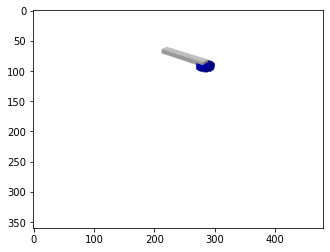

In [ ]:
# In this cell, we load our robot, set a camera point of view, then display
# the robot by getting an image from pybullet and plotting it with matplotlib.
#
#---------------------------------------------------------------------
# Start the pybullet env
# add the directory that has our urdf file to the seach path
p.connect(p.DIRECT) # or p.GUI for graphical version
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setGravity(0, 0, -10)

robot_id = p.loadURDF("custom_robot1.urdf",
                      basePosition=[1.400000, -0.200000, 0.650000], 
                      useFixedBase=True)
p.resetJointState(robot_id, 0, 0) # set the starting joint position
#p.resetJointState(robot_id, 1, math.pi) # set the starting joint position

print('Num of joints in robot:', p.getNumJoints(robot_id))

#---------------------------------------------------------------------
# Set up the "camera" point of view
cam_target_pos = [.95, -0.2, 0.2]
cam_distance = 2.05
cam_yaw, cam_pitch, cam_roll = -50, -40, 0
cam_width, cam_height = 480, 360
cam_up, cam_up_axis_idx = [0, 0, 1], 2
cam_near_plane, cam_far_plane = 0.01, 100
cam_fov = 60

cam_view_params = (cam_target_pos, cam_distance, cam_yaw, cam_pitch, cam_roll, 
                   cam_up_axis_idx)
cam_matrix_params = (cam_fov, cam_width*1./cam_height, cam_near_plane, 
                     cam_far_plane)

#---------------------------------------------------------------------
cam_view_matrix = p.computeViewMatrixFromYawPitchRoll(*cam_view_params)
cam_projection_matrix = p.computeProjectionMatrixFOV(*cam_matrix_params)
image = p.getCameraImage(cam_width, cam_height, 
                         cam_view_matrix, cam_projection_matrix
                        )[2][:, :, :3]


plt.imshow(Image.fromarray(image)) # show the last frame

p.disconnect()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (480, 360) to (480, 368) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Num of joints in robot: 1
timestep 1199...

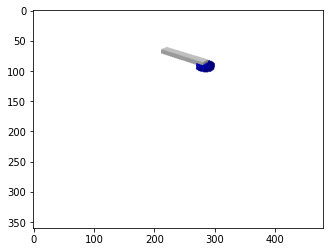

In [ ]:
#---------------------------------------------------------------------
# Start the pybullet env
# add the directory that has our urdf file to the seach path
p.connect(p.DIRECT) # or p.GUI for graphical version
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setGravity(0, 0, -10)

robot_id = p.loadURDF("custom_robot1.urdf",
                      basePosition=[1.400000, -0.200000, 0.650000], 
                      useFixedBase=True)
print('Num of joints in robot:', p.getNumJoints(robot_id))

#---------------------------------------------------------------------
# Set up the "camera" point of view
cam_target_pos = [.95, -0.2, 0.2]
cam_distance = 2.05
cam_yaw, cam_pitch, cam_roll = -50, -40, 0
cam_width, cam_height = 480, 360

cam_up, cam_up_axis_idx = [0, 0, 1], 2
cam_near_plane, cam_far_plane = 0.01, 100
cam_fov = 60

cam_view_params = (cam_target_pos, cam_distance, cam_yaw, cam_pitch, cam_roll, 
                   cam_up_axis_idx)
cam_matrix_params = (cam_fov, cam_width*1./cam_height, cam_near_plane, 
                     cam_far_plane)

#---------------------------------------------------------------------
# Start the video filewriter
vid = imageio_ffmpeg.write_frames('vid.mp4', (cam_width, cam_height), fps=30)
vid.send(None) # seed the video writer with a blank frame

#---------------------------------------------------------------------
# run the simulation for n steps
# PyBullet default simulation time step is 240fps, 
# but we want to record video at 30fps.

n = 1200 # number of time steps to simulate

for t in range(n):
    print(f'\rtimestep {t}...', end='')

    # every 8 time steps, create one video frame
    if t % 8 == 0: 
        cam_view_matrix = p.computeViewMatrixFromYawPitchRoll(*cam_view_params)
        cam_projection_matrix = p.computeProjectionMatrixFOV(*cam_matrix_params)
        image = p.getCameraImage(cam_width, cam_height, 
                                 cam_view_matrix, cam_projection_matrix
                                 )[2][:, :, :3]
        vid.send(np.ascontiguousarray(image))
    
    # every 1200 time steps, joint will cycle from 0 to 180]
    joint_angle = 0.5 * math.pi * (1 - math.cos(2*math.pi*t/1200))
    p.setJointMotorControl2(bodyIndex=robot_id, 
                            jointIndex=0, 
                            controlMode=p.POSITION_CONTROL,
                            targetPosition=joint_angle)    
    p.stepSimulation()

plt.imshow(Image.fromarray(image)) # show the last frame

vid.close()
p.disconnect()

In [ ]:
# Play recorded video

mp4 = open('vid.mp4', 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML('<video width=480 controls><source src="%s" type="video/mp4"></video>' % data_url)

In [ ]:
# Write custom robot URDF. See http://wiki.ros.org/urdf/Tutorials

urdf_str = '''
<?xml version="1.0"?>
<robot name="myrobot">
  <link name="base_link">
    <visual>
      <geometry>
        <cylinder length="0.01" radius="0.1"/>
      </geometry>
      <material name="blue">
        <color rgba="0 0 .8 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <cylinder length="0.01" radius="0.1"/>
      </geometry>
    </collision>
    <inertial>
      <mass value="10"/>
      <inertia ixx="1.0" ixy="0.0" ixz="0.0" iyy="1.0" iyz="0.0" izz="1.0"/>
    </inertial>
  </link>

  <link name="arm">
    <visual>
      <geometry>
        <box size="0.05 0.3 0.05"/>
      </geometry>
      <material name="white">
        <color rgba="0.8 0.8 .8 1"/>
      </material>
      <origin rpy="0 0 0" xyz="0 0.15 0.03"/>
    </visual>
    <collision>
      <geometry>
        <box size="0.05 0.3 0.05"/>
      </geometry>
      <origin rpy="0 0 0" xyz="0 0.15 0.03"/>
    </collision>
    <inertial>
      <mass value="10"/>
      <inertia ixx="1.0" ixy="0.0" ixz="0.0" iyy="1.0" iyz="0.0" izz="1.0"/>
    </inertial>
  </link>

  <link name="arm2">
    <visual>
      <geometry>
        <box size="0.05 0.3 0.05"/>
      </geometry>
      <material name="red">
        <color rgba="0.8 0.2 .2 1"/>
      </material>
      <origin rpy="0 0 0" xyz="0 0.15 0.03"/>
    </visual>
    <collision>
      <geometry>
        <box size="0.05 0.3 0.05"/>
      </geometry>
      <origin rpy="0 0 0" xyz="0 0.15 0.03"/>
    </collision>
    <inertial>
      <mass value="10"/>
      <inertia ixx="1.0" ixy="0.0" ixz="0.0" iyy="1.0" iyz="0.0" izz="1.0"/>
    </inertial>
  </link>

  <link name="end_effector">
    <visual>
      <geometry>
        <box size="0.05 0.3 0.05"/>
      </geometry>
      <material name="red">
        <color rgba="0.8 0.2 .2 1"/>
      </material>
      <origin rpy="0 0 0" xyz="0 0.15 0.03"/>
    </visual>
    <collision>
      <geometry>
        <box size="0.05 0.3 0.05"/>
      </geometry>
      <origin rpy="0 0 0" xyz="0 0.15 0.03"/>
    </collision>
    <inertial>
      <mass value="10"/>
      <inertia ixx="1.0" ixy="0.0" ixz="0.0" iyy="1.0" iyz="0.0" izz="1.0"/>
    </inertial>
  </link>

  <joint name="base_to_arm" type="revolute">
    <parent link="base_link"/>
    <child link="arm"/>
    <axis xyz="0 0 1"/>
    <origin rpy="0 0 0" xyz="0 0 0"/>
    <limit effort="1000.0" lower="0.0" upper="3.14" velocity="0.5"/>
  </joint>

  <joint name="arm_to_arm2" type="revolute">
    <parent link="arm"/>
    <child link="arm2"/>
    <axis xyz="0 0 1"/>
    <origin rpy="0 0 0" xyz="0 0.3 0"/>
    <limit effort="1000.0" lower="-3.14" upper="3.14" velocity="0.5"/>
  </joint>

  <joint name="arm2_to_end_effector" type="revolute">
    <parent link="arm2"/>
    <child link="end_effector"/>
    <axis xyz="0 0 1"/>
    <origin rpy="0 0 0" xyz="0 0.3 0"/>
    <limit effort="1000.0" lower="-3.14" upper="3.14" velocity="0.5"/>
  </joint>

</robot>
'''

with open('custom_robot2.urdf', 'w') as f:
    f.write(urdf_str)

Num of joints in robot: 3


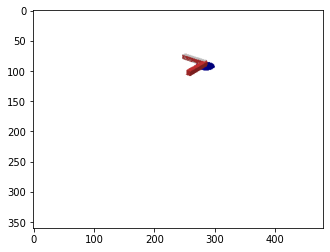

In [ ]:
# In this cell, we load our robot, set a camera point of view, then display
# the robot by getting an image from pybullet and plotting it with matplotlib.
#
#---------------------------------------------------------------------
# Start the pybullet env
# add the directory that has our urdf file to the seach path
p.connect(p.DIRECT) # or p.GUI for graphical version
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setGravity(0, 0, -10)

robot_id = p.loadURDF("custom_robot2.urdf",
                      basePosition=[1.400000, -0.200000, 0.650000], 
                      useFixedBase=True)
p.resetJointState(robot_id, 0, 0) # set the starting joint position
p.resetJointState(robot_id, 1, math.pi) # set the starting joint position
p.resetJointState(robot_id, 2, -math.pi/2) # set the starting joint position

print('Num of joints in robot:', p.getNumJoints(robot_id))

#---------------------------------------------------------------------
# Set up the "camera" point of view
cam_target_pos = [.95, -0.2, 0.2]
cam_distance = 2.05
cam_yaw, cam_pitch, cam_roll = -50, -40, 0
cam_width, cam_height = 480, 360
cam_up, cam_up_axis_idx = [0, 0, 1], 2
cam_near_plane, cam_far_plane = 0.01, 100
cam_fov = 60

cam_view_params = (cam_target_pos, cam_distance, cam_yaw, cam_pitch, cam_roll, 
                   cam_up_axis_idx)
cam_matrix_params = (cam_fov, cam_width*1./cam_height, cam_near_plane, 
                     cam_far_plane)

#---------------------------------------------------------------------
cam_view_matrix = p.computeViewMatrixFromYawPitchRoll(*cam_view_params)
cam_projection_matrix = p.computeProjectionMatrixFOV(*cam_matrix_params)
image = p.getCameraImage(cam_width, cam_height, 
                         cam_view_matrix, cam_projection_matrix
                        )[2][:, :, :3]


plt.imshow(Image.fromarray(image)) # show the last frame

p.disconnect()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (480, 360) to (480, 368) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Num of joints in robot: 3
timestep 1199...

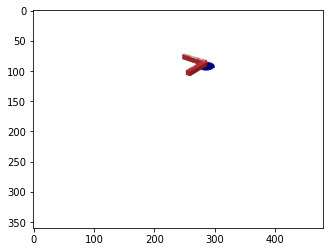

In [ ]:
#---------------------------------------------------------------------
# Start the pybullet env
# add the directory that has our urdf file to the seach path
p.connect(p.DIRECT) # or p.GUI for graphical version
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setGravity(0, 0, -10)

robot_id = p.loadURDF("custom_robot2.urdf",
                      basePosition=[1.400000, -0.200000, 0.650000], 
                      useFixedBase=True)
print('Num of joints in robot:', p.getNumJoints(robot_id))
p.resetJointState(robot_id, 0, 0) # set the starting joint position
p.resetJointState(robot_id, 1, math.pi) # set the starting joint position
p.resetJointState(robot_id, 2, -math.pi/2) # set the starting joint position


#---------------------------------------------------------------------
# Set up the "camera" point of view
cam_target_pos = [.95, -0.2, 0.2]
cam_distance = 2.05
cam_yaw, cam_pitch, cam_roll = -50, -40, 0
cam_width, cam_height = 480, 360

cam_up, cam_up_axis_idx = [0, 0, 1], 2
cam_near_plane, cam_far_plane = 0.01, 100
cam_fov = 60

cam_view_params = (cam_target_pos, cam_distance, cam_yaw, cam_pitch, cam_roll, 
                   cam_up_axis_idx)
cam_matrix_params = (cam_fov, cam_width*1./cam_height, cam_near_plane, 
                     cam_far_plane)

#---------------------------------------------------------------------
# Start the video filewriter
vid = imageio_ffmpeg.write_frames('vid.mp4', (cam_width, cam_height), fps=30)
vid.send(None) # seed the video writer with a blank frame

#---------------------------------------------------------------------
# run the simulation for n steps
# PyBullet default simulation time step is 240fps, 
# but we want to record video at 30fps.

n = 1200 # number of time steps to simulate

for t in range(n):
    print(f'\rtimestep {t}...', end='')

    # every 8 time steps, create one video frame
    if t % 8 == 0: 
        cam_view_matrix = p.computeViewMatrixFromYawPitchRoll(*cam_view_params)
        cam_projection_matrix = p.computeProjectionMatrixFOV(*cam_matrix_params)
        image = p.getCameraImage(cam_width, cam_height, 
                                 cam_view_matrix, cam_projection_matrix
                                 )[2][:, :, :3]
        vid.send(np.ascontiguousarray(image))
    
    # every 1200 time steps, joint will cycle from 0 to 180]
    joint_angle = 0.5 * math.pi * 0.5*(1 - math.cos(2*math.pi*t/1200))
    p.setJointMotorControl2(bodyIndex=robot_id, 
                            jointIndex=0, 
                            controlMode=p.POSITION_CONTROL,
                            targetPosition=joint_angle)    
    p.setJointMotorControl2(bodyIndex=robot_id, 
                            jointIndex=1, 
                            controlMode=p.POSITION_CONTROL,
                            targetPosition=math.pi -2*joint_angle)    
    p.setJointMotorControl2(bodyIndex=robot_id, 
                            jointIndex=2, 
                            controlMode=p.POSITION_CONTROL,
                            targetPosition=joint_angle-math.pi/2)    
    p.stepSimulation()

plt.imshow(Image.fromarray(image)) # show the last frame

vid.close()
p.disconnect()

# Play recorded video
mp4 = open('vid.mp4', 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML('<video width=480 controls><source src="%s" type="video/mp4"></video>' % data_url)

In [ ]:
# Play recorded video

mp4 = open('vid.mp4', 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML('<video width=480 controls><source src="%s" type="video/mp4"></video>' % data_url)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (480, 360) to (480, 368) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Num of joints in robot: 1
timestep 1199...

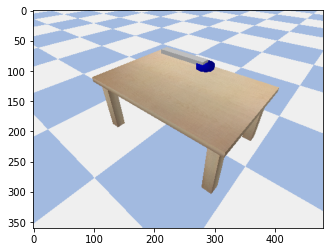

In [ ]:
#---------------------------------------------------------------------
# Start the pybullet env
# add the directory that has our urdf file to the seach path
p.connect(p.DIRECT) # or p.GUI for graphical version
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setGravity(0, 0, -10)

robot_id = p.loadURDF("custom_robot1.urdf",
                      basePosition=[1.400000, -0.200000, 0.650000], 
                      useFixedBase=True)
plane_id = p.loadURDF("plane.urdf")
table_id = p.loadURDF("table/table.urdf", basePosition=[1.0, -0.2, 0.0], 
                      baseOrientation=[0, 0, 0.7071, 0.7071])
cube_id = p.loadURDF("cube.urdf", basePosition=[0.9, -0.2, 0.675], 
                     globalScaling=0.1)
print('Num of joints in robot:', p.getNumJoints(robot_id))

#---------------------------------------------------------------------
# Set up the "camera" point of view
cam_target_pos = [.95, -0.2, 0.2]
cam_distance = 2.05
cam_yaw, cam_pitch, cam_roll = -50, -40, 0
cam_width, cam_height = 480, 360
cam_up, cam_up_axis_idx = [0, 0, 1], 2
cam_near_plane, cam_far_plane = 0.01, 100
cam_fov = 60

cam_view_params = (cam_target_pos, cam_distance, cam_yaw, 
                   cam_pitch, cam_roll, cam_up_axis_idx)
cam_matrix_params = (cam_fov, cam_width*1./cam_height, cam_near_plane, 
                     cam_far_plane)

#---------------------------------------------------------------------
# Start the video filewriter
vid = imageio_ffmpeg.write_frames('vid.mp4', (cam_width, cam_height), fps=30)
vid.send(None) # seed the video writer with a blank frame

#---------------------------------------------------------------------
# run the simulation for n steps
# PyBullet default simulation time step is 240fps, 
# but we want to record video at 30fps.

n = 1200 # number of time steps to simulate

for t in range(n):
    print(f'\rtimestep {t}...', end='')

    # every 8 time steps, create one video frame
    if t % 8 == 0: 
        cam_view_matrix = p.computeViewMatrixFromYawPitchRoll(*cam_view_params)
        cam_projection_matrix = p.computeProjectionMatrixFOV(*cam_matrix_params)
        image = p.getCameraImage(cam_width, cam_height, 
                                 cam_view_matrix, cam_projection_matrix
                                 )[2][:, :, :3]
        vid.send(np.ascontiguousarray(image))
    
    # every 1200 time steps, joint will cycle from 0 to 180]
    joint_angle = 0.5 * math.pi * (1 - math.cos(2*math.pi*t/1200))
    p.setJointMotorControl2(bodyIndex=robot_id, 
                            jointIndex=0, 
                            controlMode=p.POSITION_CONTROL,
                            targetPosition=joint_angle)    
    p.stepSimulation()

plt.imshow(Image.fromarray(image)) # show the last frame

vid.close()
p.disconnect()

# Play recorded video

mp4 = open('vid.mp4', 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML('<video width=480 controls><source src="%s" type="video/mp4"></video>' % data_url)

In [ ]:
#---------------------------------------------------------------------
# Start the pybullet env
# add the directory that has our urdf file to the seach path
p.connect(p.DIRECT) # or p.GUI for graphical version
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setGravity(0, 0, -10)

robot_id = p.loadURDF("custom_robot.urdf",
                      basePosition=[1.400000, -0.200000, 0.650000], 
                      useFixedBase=True)
print('Num of joints in robot:', p.getNumJoints(robot_id))

#---------------------------------------------------------------------
# Set up the "camera" point of view
cam_target_pos = [.95, -0.2, 0.2]
cam_distance = 2.05
cam_yaw, cam_pitch, cam_roll = -50, -40, 0
cam_width, cam_height = 480, 360

cam_up, cam_up_axis_idx = [0, 0, 1], 2
cam_near_plane, cam_far_plane = 0.01, 100
cam_fov = 60

cam_view_params = (cam_target_pos, cam_distance, cam_yaw, cam_pitch, cam_roll, 
                   cam_up_axis_idx)
cam_matrix_params = (cam_fov, cam_width*1./cam_height, cam_near_plane, 
                     cam_far_plane)

#---------------------------------------------------------------------
# Start the video filewriter
vid = imageio_ffmpeg.write_frames('vid.mp4', (cam_width, cam_height), fps=30)
vid.send(None) # seed the video writer with a blank frame

#---------------------------------------------------------------------
# run the simulation for n steps
# PyBullet default simulation time step is 240fps, 
# but we want to record video at 30fps.

n = 1200 # number of time steps to simulate

for t in range(n):
    print(f'\rtimestep {t}...', end='')

    # every 8 time steps, create one video frame
    if t % 8 == 0: 
        cam_view_matrix = p.computeViewMatrixFromYawPitchRoll(*cam_view_params)
        cam_projection_matrix = p.computeProjectionMatrixFOV(*cam_matrix_params)
        image = p.getCameraImage(cam_width, cam_height, 
                                 cam_view_matrix, cam_projection_matrix
                                 )[2][:, :, :3]
        vid.send(np.ascontiguousarray(image))
    
    # every 1200 time steps, joint will cycle from 0 to 180]
    joint_angle = 0.5 * math.pi * (1 - math.cos(2*math.pi*t/1200))
    p.setJointMotorControl2(bodyIndex=robot_id, 
                            jointIndex=0, 
                            controlMode=p.POSITION_CONTROL,
                            targetPosition=joint_angle)    
    p.setJointMotorControl2(bodyIndex=robot_id, 
                            jointIndex=1, 
                            controlMode=p.POSITION_CONTROL,
                            targetPosition=math.pi -joint_angle)    
    p.stepSimulation()

plt.imshow(Image.fromarray(image)) # show the last frame

vid.close()
p.disconnect()